In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import datetime as dt


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [21]:
df = pd.read_csv('/Users/alex/Downloads/RecruitmentExercises/avocado.csv',
                 parse_dates=['Date'])


In [22]:
df = df.drop('index', 1)


In [23]:
dataSize = df.shape
print(dataSize)

(18249, 13)


In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [25]:
pd.isnull(df).sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [38]:
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.strftime('%A')

In [49]:
def season(x):
    if(x>=3 and x<=5):
        return 'Spring'
    elif(x>=6 and x<=8):
        return 'Summer'
    elif(x>=9 and x<=11):
        return 'Autumn'
    else:
        return 'Winter'

In [51]:
df['season']=df['month'].apply(season)

In [162]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day_of_week,season,Revenue,yearmonth
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,Sunday,Winter,85434.7046,201512
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,Sunday,Winter,74083.9230,201512
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,Sunday,Winter,109944.8046,201512
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,Friday,Summer,85311.5220,201506
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,Sunday,Autumn,65330.6880,201511


In [43]:
df.corr()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.015344
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.014522
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.015892
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.006182
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.098812


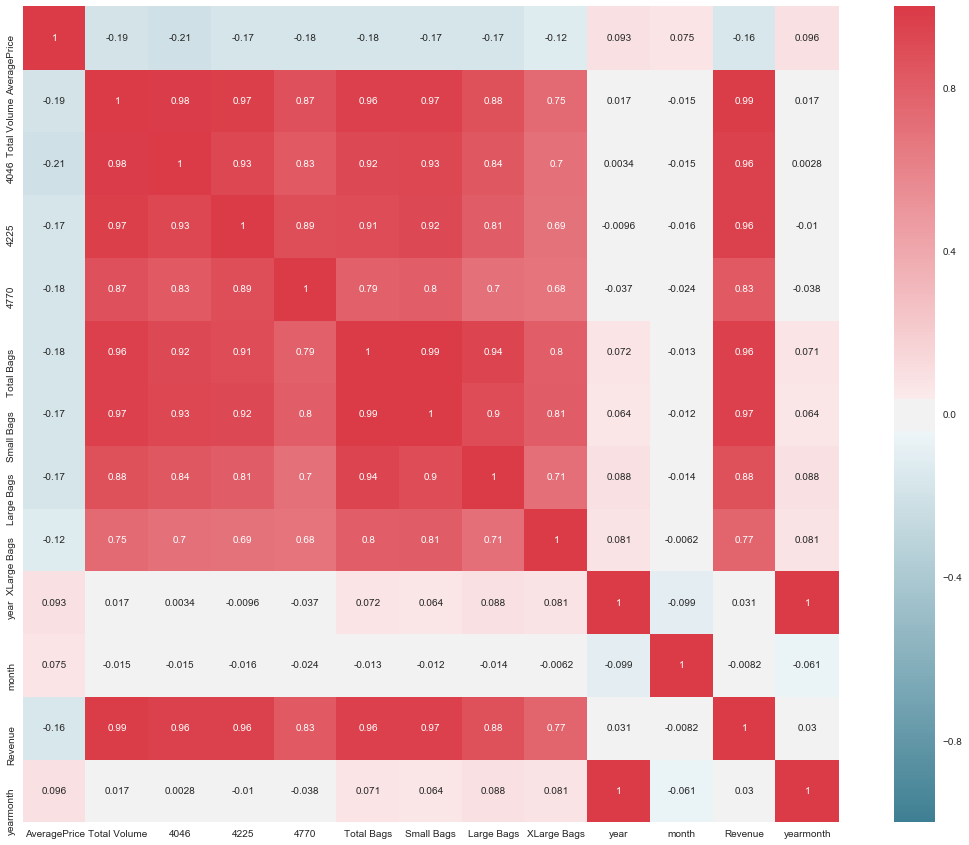

In [169]:
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True,
            square=True, ax=ax)

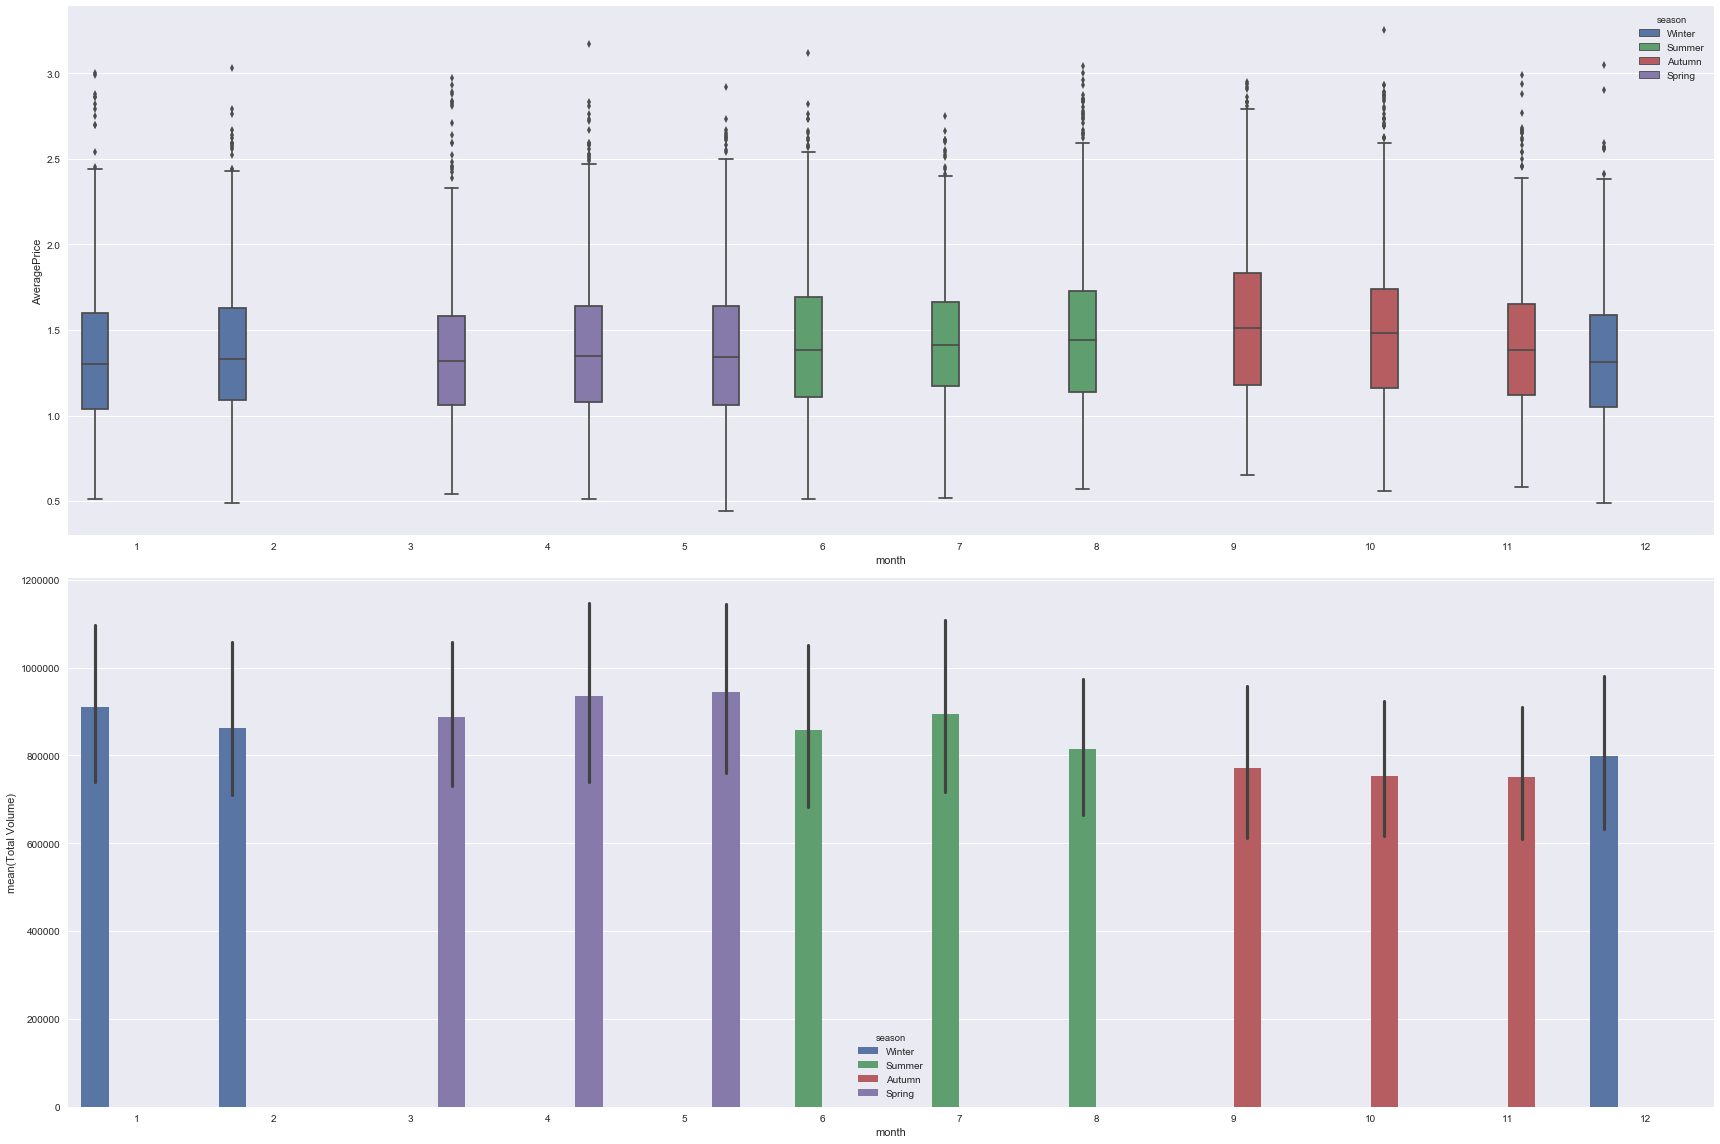

In [153]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot('month','AveragePrice',data=df,hue='season')
plt.tight_layout(rect=(0,0,2,2))
plt.subplot(2,1,2)
sns.barplot('month','Total Volume',data=df,hue='season')
plt.tight_layout(rect=(0,0,2,2))

In [163]:
ts = filter_non_region(df).groupby('Date')['AveragePrice'].mean().reset_index()
ts2 = filter_non_region(df).groupby('Date')['Total Volume'].mean().reset_index()



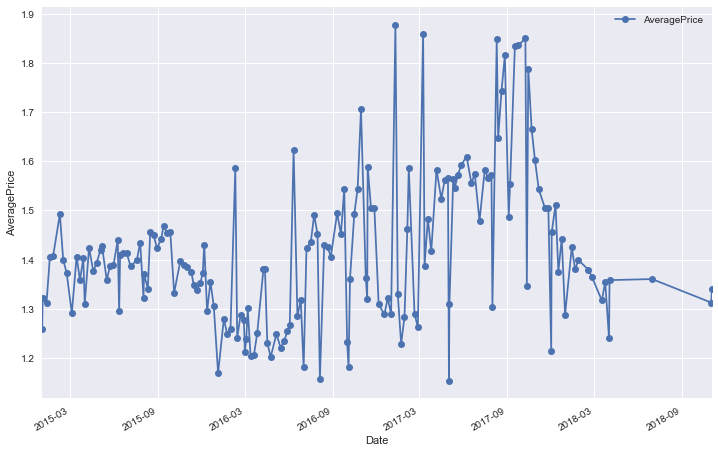

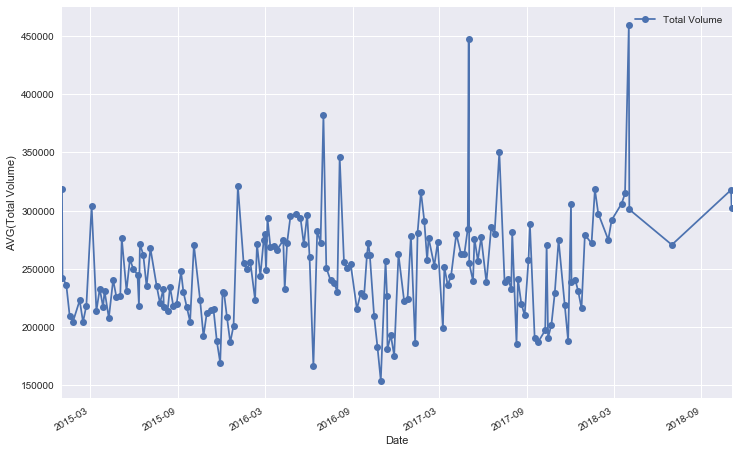

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ts.set_index('Date').plot(ax=ax, marker="o", linestyle="-")
plt.ylabel("AveragePrice")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ts2.set_index('Date').plot(ax=ax, marker="o", linestyle="-")
plt.ylabel("AVG(Total Volume)")


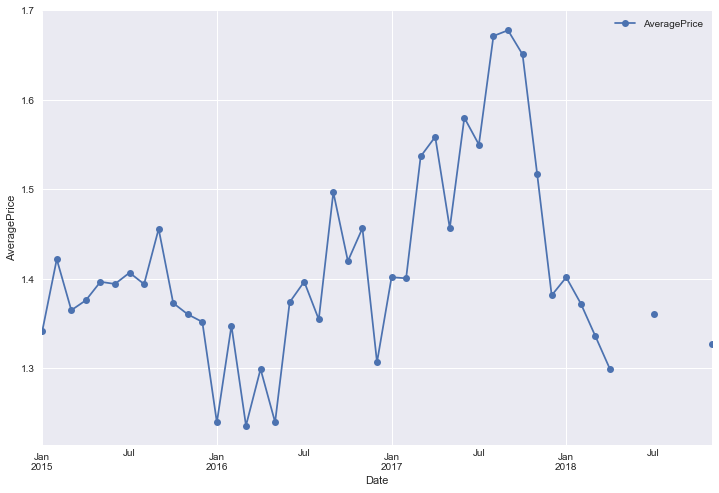

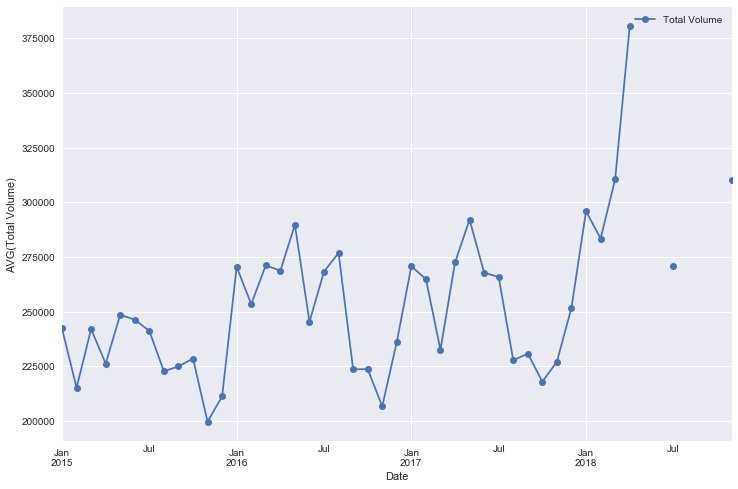

In [165]:

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(ts.set_index('Date')
   .resample('1M')
   .mean()
   .plot(ax=ax, marker="o", linestyle="-"))
plt.ylabel("AveragePrice")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(ts2.set_index('Date')
   .resample('1M')
   .mean()
   .plot(ax=ax, marker="o", linestyle="-"))
plt.ylabel("AVG(Total Volume)")

In [158]:
def filter_non_region(df):
    df = df[df.region!='TotalUS']
    df = df[df.region!='West']
    df = df[df.region!='California']
    df = df[df.region!='GreatLakes']
    df = df[df.region!='Northeast']
    df = df[df.region!='Midsouth']
    df = df[df.region!='SouthCentral']
    df = df[df.region!='Southeast']
    df = df[df.region!='Plains']
    return df

In [159]:
df_grouped = pd.DataFrame(filter_non_region(df).groupby('region').mean()['AveragePrice'].sort_values()).reset_index()
df_grouped_vol = pd.DataFrame(filter_non_regiondf.groupby('region').mean()['Total Volume'].sort_values()).reset_index()

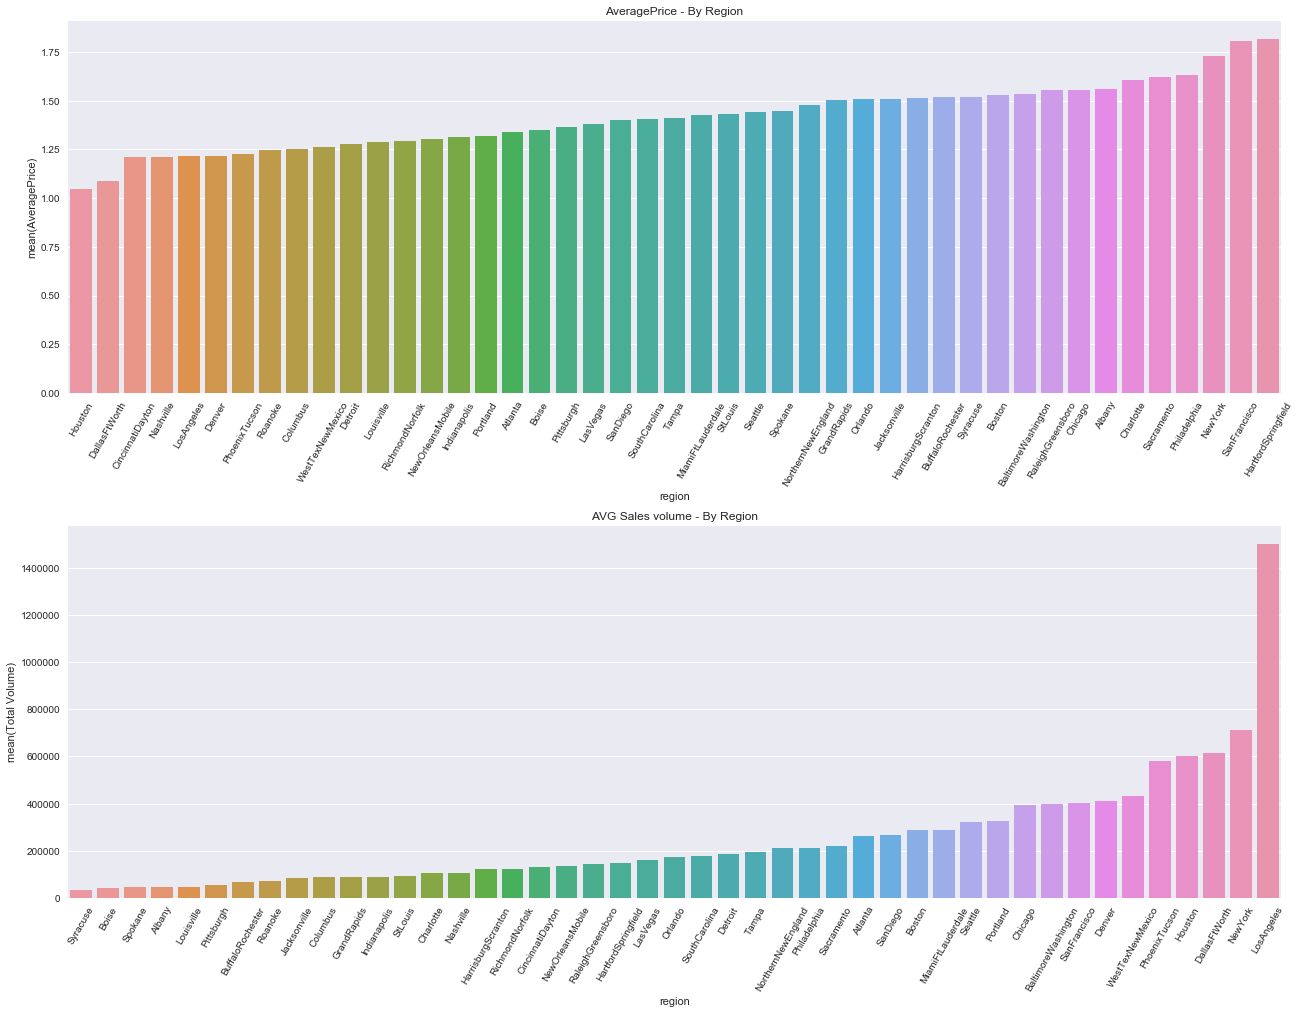

In [161]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
sns.barplot(df_grouped['region'],df_grouped['AveragePrice'])
plt.title('AveragePrice - By Region')
plt.xticks(rotation=60)
plt.subplot(2,1,2)
sns.barplot(df_grouped_vol['region'],df_grouped_vol['Total Volume'])
plt.title('AVG Sales volume - By Region')
plt.xticks(rotation=60)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

/Users/alex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


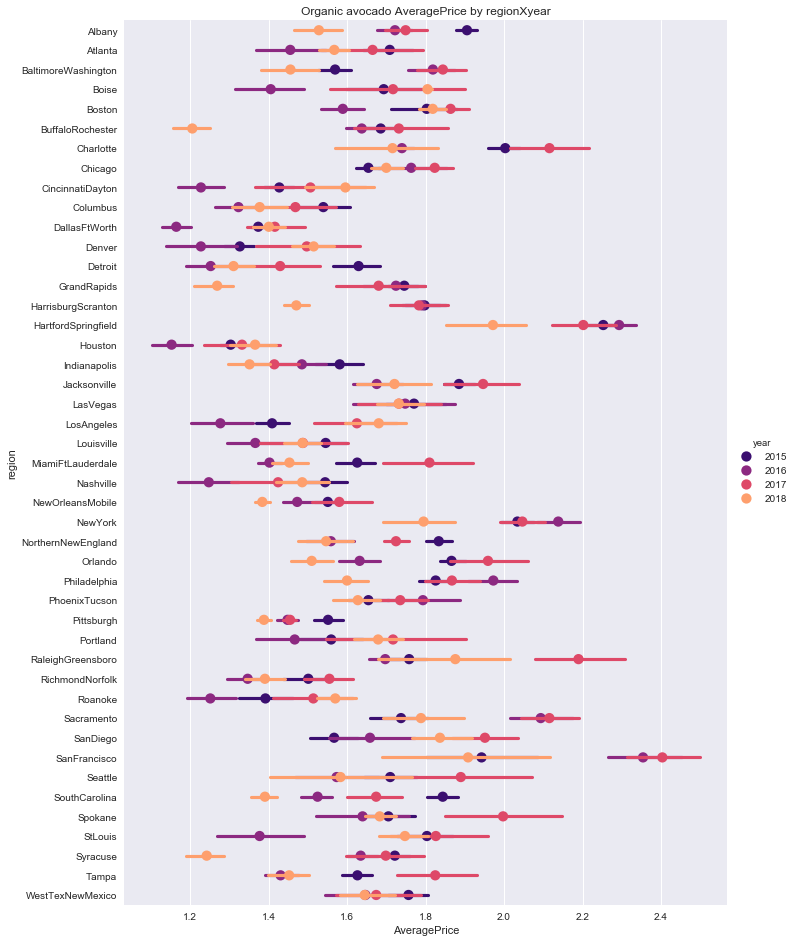

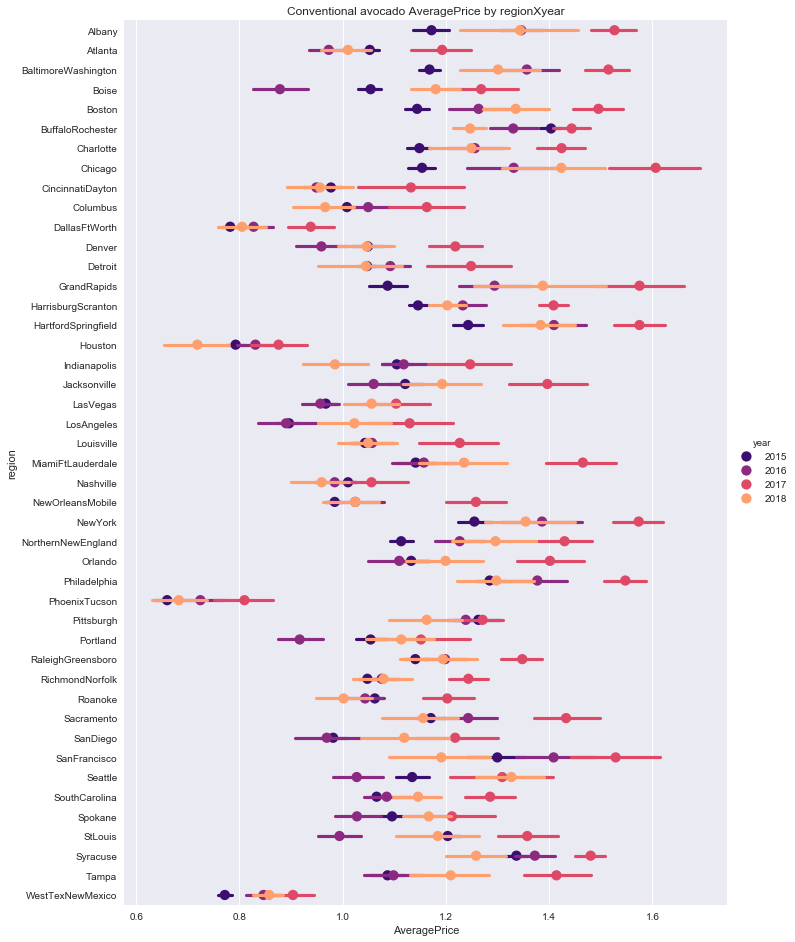

In [166]:
mask_organic = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=filter_non_region(df)[mask_organic],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )
g.ax.set_title('Organic avocado AveragePrice by regionXyear')
mask_conventional = df['type']=='conventional'
g2 = sns.factorplot('AveragePrice','region',data=filter_non_region(df)[mask_conventional],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )
g2.ax.set_title('Conventional avocado AveragePrice by regionXyear')


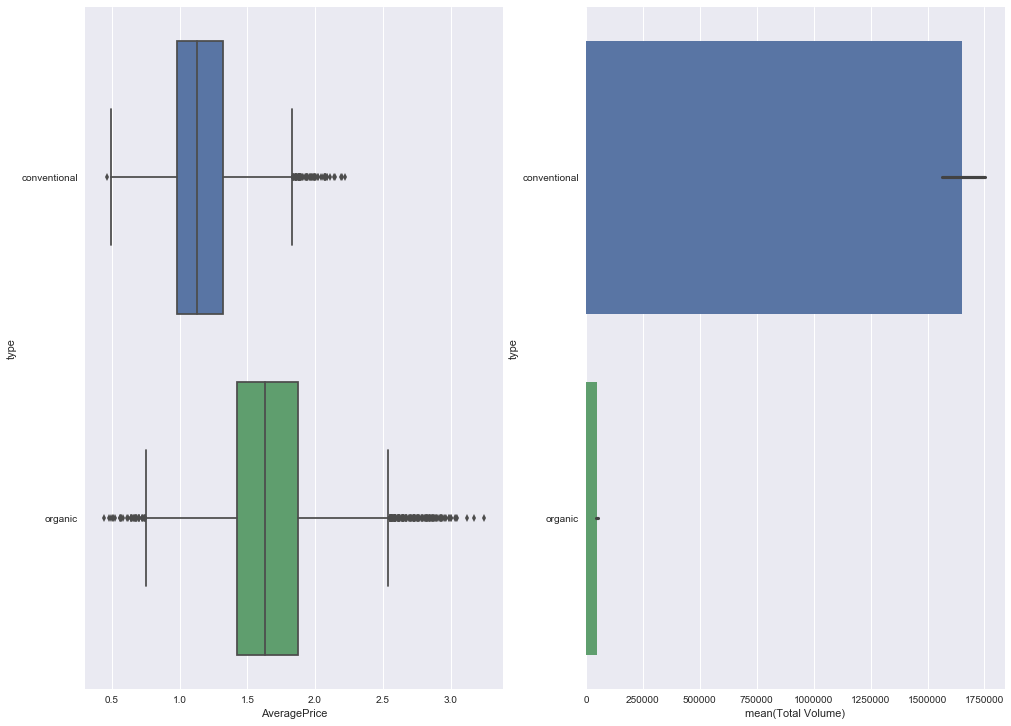

In [167]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.boxplot(y="type", x="AveragePrice", data=df)
plt.subplot(1,2,2)
sns.barplot(y="type", x="Total Volume", data=df)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [97]:
df['Revenue']=df['AveragePrice']*df['Total Volume']


In [99]:
categorical = ['type','region','month','day_of_week','year',
               'month','day_of_week']
numrical = ['Revenue','AveragePrice','Total Volume','4046','4225','4770',
            ,'Small Bags','Large Bags','XLarge Bags']

In [101]:
df_grouped = df.groupby(['month']).agg({'Revenue':'sum'})\
    .reset_index().sort_values(['mean'],ascending=False)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day_of_week,season,Revenue
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,Sunday,Winter,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,Sunday,Winter,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,Sunday,Winter,109944.8046
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,Friday,Summer,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,Sunday,Autumn,65330.6880


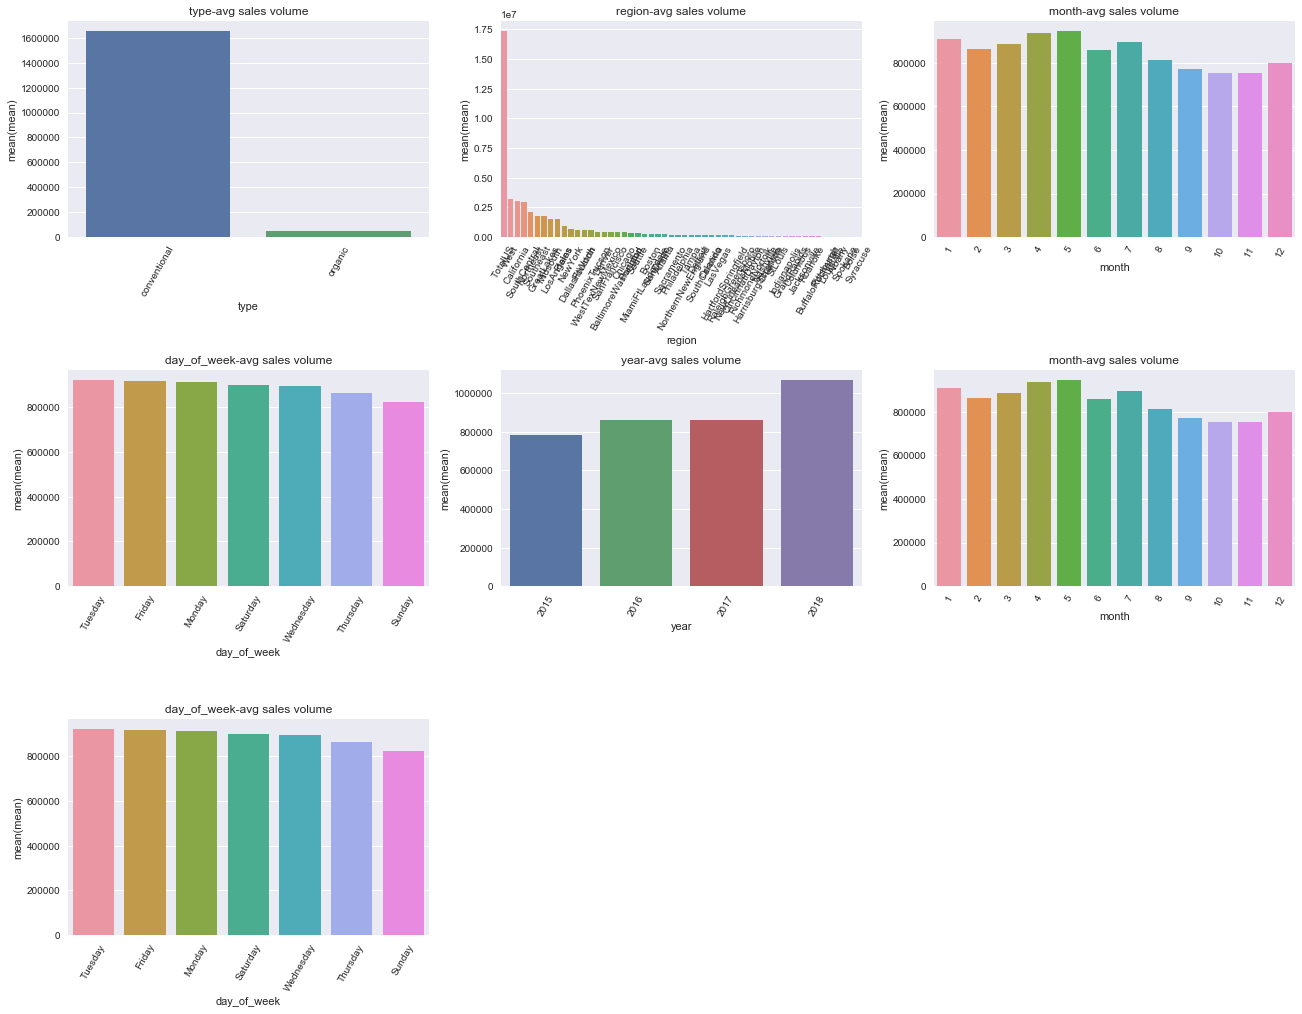

In [100]:
i=1
plt.figure(figsize=(18,14))
for dim in categorical:
    df_grouped = df.groupby([dim]).agg({'Total Volume':'mean'})\
    .reset_index().rename(columns={'Total Volume': 'mean'}).sort_values(['mean'],ascending=False)
    plt.subplot(3,3,i)
    sns.barplot(df_grouped[dim],df_grouped['mean'])
    plt.title('{}-avg sales volume'.format(dim))
    plt.xticks(rotation=60)
    i=i+1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

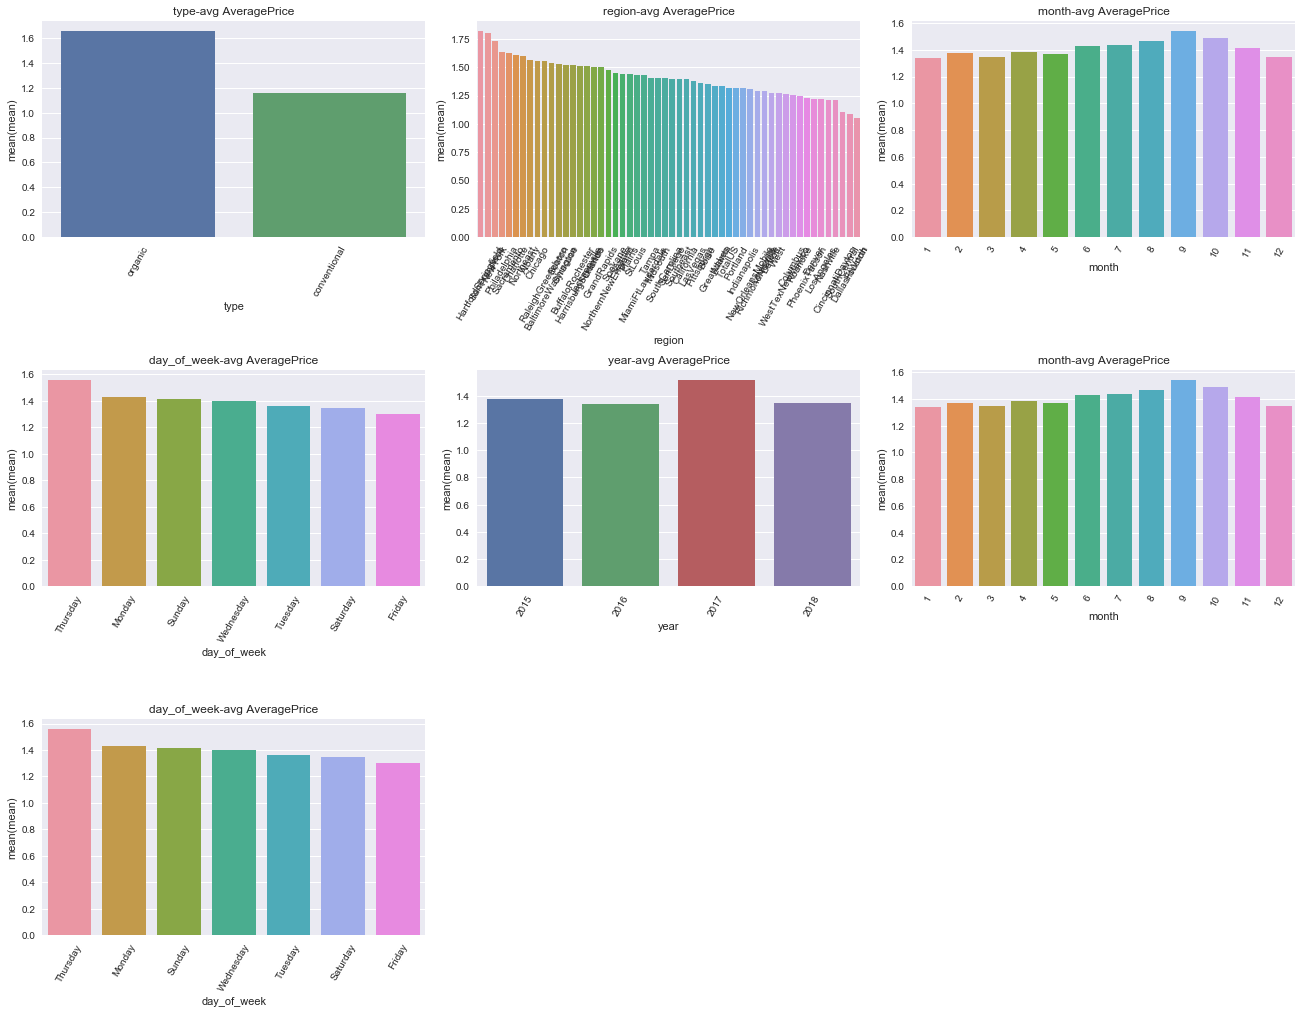

In [175]:
i=1
plt.figure(figsize=(18,14))
for dim in categorical:
    df_grouped = df.groupby([dim]).agg({'AveragePrice':'mean'})\
    .reset_index().rename(columns={'AveragePrice': 'mean'}).sort_values(['mean'],ascending=False)
    plt.subplot(3,3,i)
    sns.barplot(df_grouped[dim],df_grouped['mean'])
    plt.title('{}-avg AveragePrice'.format(dim))
    plt.xticks(rotation=60)
    i=i+1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [170]:
def generate_interaction(df,column1,column2):
    target_column = '_'.join([column1, column2]) + '_interaction'
    df[target_column] = df[column1] * df[column2]
    return df

In [197]:
categorical = ['type','region','month','day_of_week','year']
numrical = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [198]:
cols_of_intreset = categorical + numrical

In [235]:
df = df.sort_values(['Date'],ascending=True)

In [236]:
dataset = filter_non_region(df)[cols_of_intreset+['AveragePrice']]

In [239]:
dataset = pd.get_dummies(dataset[cols_of_intreset  + ['AveragePrice']], 
                         prefix=categorical, 
                         columns=categorical)

In [240]:
dataset.shape

(15207, 77)

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('AveragePrice',1), 
                                                    dataset['AveragePrice'], 
                                                    test_size=0.2,
                                                    shuffle=False)



In [242]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge,ElasticNet,HuberRegressor,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

In [243]:
regressors = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighborsRegressor :', KNeighborsRegressor()],
               ['SVM :', SVR()],
               ['AdaBoostRegressor :', AdaBoostRegressor()],
               ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['LinearRegression: ', LinearRegression()],
               ['HuberRegressor: ', HuberRegressor()]]

print("Results - root-mean-square-error:\n")


for name,regressor in regressors:
    regressor = regressor
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results - root-mean-square-error:

DecisionTree : 0.326441173229
RandomForest : 0.254026640705
KNeighborsRegressor : 0.308715910633
SVM : 0.421625795728
AdaBoostRegressor : 0.304969312893
GradientBoostingRegressor:  0.292974485183
BayesianRidge:  0.307387718136
ElasticNet:  0.375884766698
LinearRegression:  0.307815547322
HuberRegressor:  1.41212748522


In [254]:
def gradient_booster_hyper_params(x_train, y_train):
    model = GradientBoostingRegressor()
    learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.001]
    n_estimators = [1, 4, 8, 16, 32, 64, 100]
    max_depths = 2*np.linspace(1, 15, 15, endpoint=True)
    min_samples_splits = np.linspace(0.1, 1.0, 6, endpoint=True)
    min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
    max_features = list(range(1,x_train.shape[1]))
    hyperparameter_grid = {
        'n_estimators': n_estimators,
        'max_depth': max_depths,
        'min_samples_leaf': min_samples_leafs,
        'min_samples_split': min_samples_splits,
        'max_features': max_features,
        'learning_rate': learning_rates}
    randomsearch = RandomizedSearchCV(model, hyperparameter_grid, n_iter=20,verbose=1, scoring = 'neg_mean_squared_error')
    rand_search_train = randomsearch.fit(x_train, y_train)
    return rand_search_train

In [248]:
def random_forest_hyper_params(x_train, y_train):
    model = RandomForestRegressor()
    n_estimators = [1, 4, 8, 16, 32, 64, 100]
    max_depths = 2*np.linspace(1, 15, 15, endpoint=True)
    min_samples_splits = np.linspace(0.1, 1.0, 6, endpoint=True)
    min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
    max_features = list(range(1,x_train.shape[1]))
    hyperparameter_grid = {
        'n_estimators': n_estimators,
        'max_depth': max_depths,
        'min_samples_leaf': min_samples_leafs,
        'min_samples_split': min_samples_splits,
        'max_features': max_features}
    randomsearch = RandomizedSearchCV(model, hyperparameter_grid, n_iter=20,verbose=1, scoring = 'neg_mean_squared_error')
    rand_search_train = randomsearch.fit(x_train, y_train)
    return rand_search_train

In [250]:
random_forest_hyper_params = random_forest_hyper_params(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.2s finished


In [255]:
gradient_booster_hyper_params = gradient_booster_hyper_params(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.4s finished


In [256]:
def get_diagram_data(y, p, n_bins):
    n_bins = float(n_bins)  
    mean_predicted_values = np.empty((0,))
    true_fractions = np.zeros((0,))

    for b in range(1, int(n_bins) + 1):
        i = np.logical_and(p <= b / n_bins, p > (b - 1) / n_bins)  # indexes for p in the current bin
        if np.sum(i) == 0 or np.sum(y[i]) == 0:
            continue

        mean_predicted_value = np.mean(p[i])
        true_fraction = float(np.sum(y[i]) / np.sum(i))
        mean_predicted_values = np.hstack((mean_predicted_values, mean_predicted_value))
        true_fractions = np.hstack((true_fractions, true_fraction))

    return (mean_predicted_values, true_fractions)

In [257]:
gradient_booster_hyper_params.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=28.0,
             max_features=11, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=0.10000000000000001,
             min_samples_split=0.28000000000000003,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [258]:
random_forest_hyper_params.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12.0,
           max_features=29, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.10000000000000001,
           min_samples_split=0.28000000000000003,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [289]:
random_forest = RandomForestRegressor()

gbm = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=28.0,
             max_features=11, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=0.10000000000000001,
             min_samples_split=0.28000000000000003,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
br = BayesianRidge()

random_forest.fit(X_train, y_train)
gbm.fit(X_train,y_train)
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [290]:
y_predicted_test_rf = random_forest.predict(X_test)
y_predicted_test_gbm = gbm.predict(X_test)
y_predicted_test_br = br.predict(X_test)

In [295]:
print('Random Forest: RMSE: {} '.format((np.sqrt(mean_squared_error(y_predicted_test_rf, y_test)))))
print('Gradient-Boosting: RMSE: {}'.format((np.sqrt(mean_squared_error(y_predicted_test_gbm, y_test)))))
print('BayesianRidge: RMSE: {}'.format((np.sqrt(mean_squared_error(y_predicted_test_br, y_test)))))


Random Forest: RMSE: 0.25053981693237415 
Gradient-Boosting: RMSE: 0.31170693362215873
BayesianRidge: RMSE: 0.3073877181356972


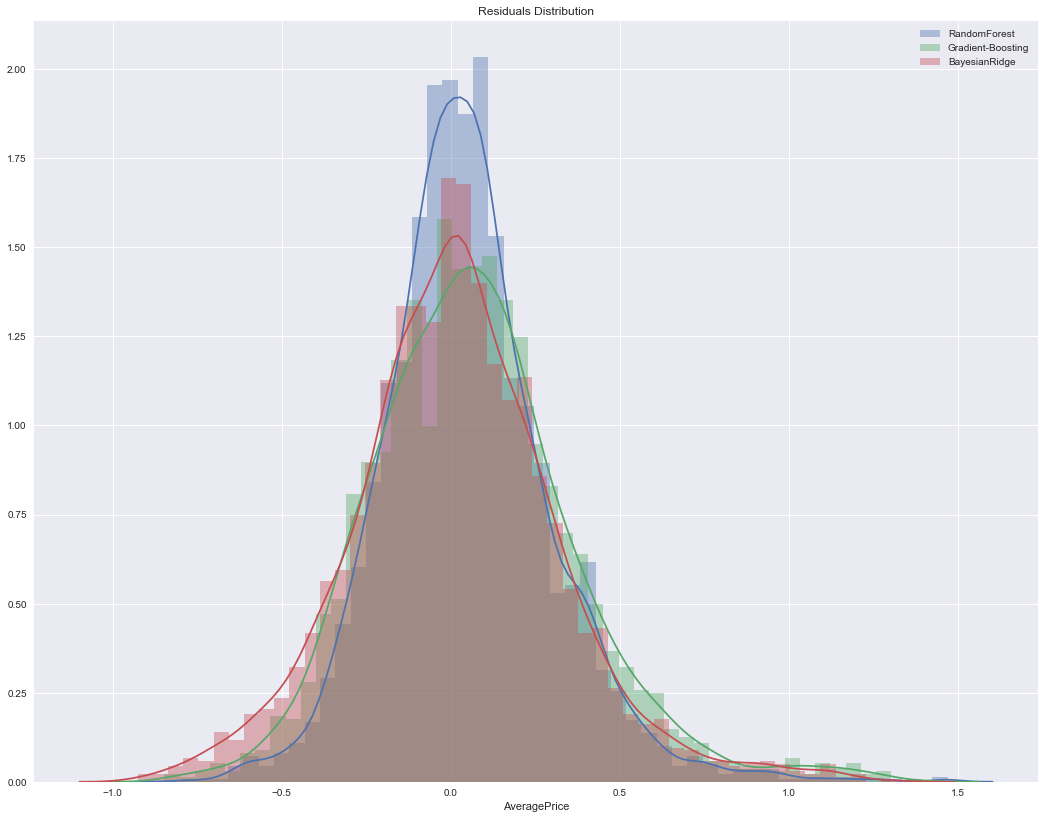

In [300]:
plt.figure(figsize=(18,14))

sns.distplot((y_test-y_predicted_test_rf),bins=50, label = 'RandomForest')
sns.distplot((y_test-y_predicted_test_gbm),bins=50, label = 'Gradient-Boosting')
sns.distplot((y_test-y_predicted_test_br),bins=50, label = 'BayesianRidge')
plt.title('Residuals Distribution')
plt.legend()

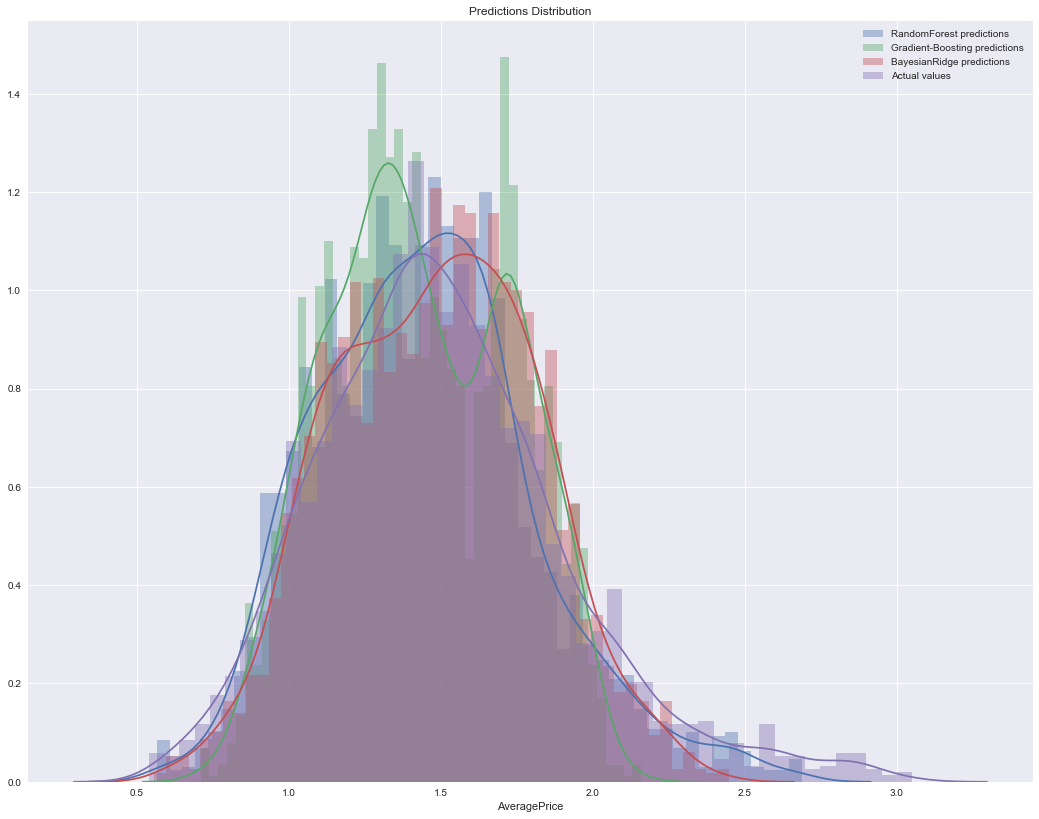

In [304]:
plt.figure(figsize=(18,14))

sns.distplot((y_predicted_test_rf),bins=50, label = 'RandomForest predictions')
sns.distplot((y_predicted_test_gbm),bins=50, label = 'Gradient-Boosting predictions')
sns.distplot((y_predicted_test_br),bins=50, label = 'BayesianRidge predictions')
sns.distplot((y_test),bins=50, label = 'Actual values')

plt.title('Predictions Distribution')
plt.legend()

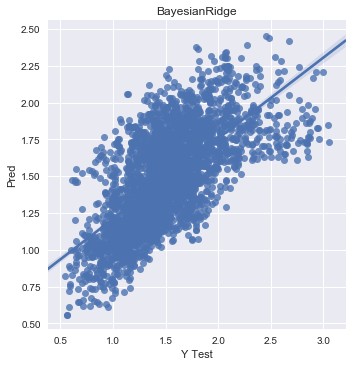

In [307]:
plt.figure(figsize=(12,12))
data_br = pd.DataFrame({'Y Test':y_test , 'Pred':y_predicted_test_br},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_br,palette='rainbow')
data.head()
plt.title('BayesianRidge')



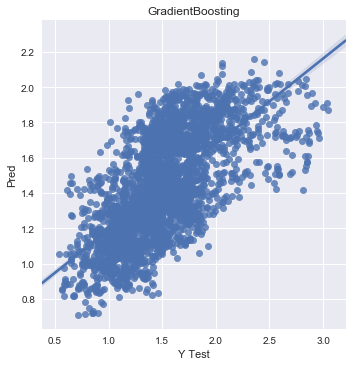

In [308]:
plt.figure(figsize=(12,12))
data_gbm = pd.DataFrame({'Y Test':y_test , 'Pred':y_predicted_test_gbm},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_gbm,palette='rainbow')
data.head()
plt.title('GradientBoosting')


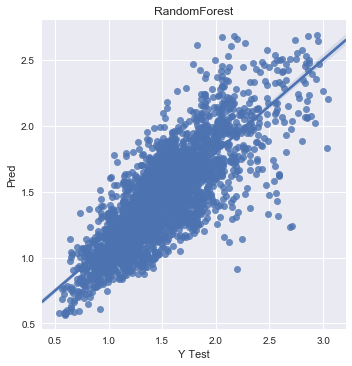

In [309]:
plt.figure(figsize=(12,12))

data_rf = pd.DataFrame({'Y Test':y_test , 'Pred':y_predicted_test_rf},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_rf,palette='rainbow')
data.head()
plt.title('RandomForest')

In [310]:
from operator import itemgetter
list(zip(X_train, random_forest.feature_importances_))

[('4046', 0.11796133483825619),
 ('4225', 0.065403301523430449),
 ('4770', 0.029980064868983136),
 ('Small Bags', 0.060480548351939743),
 ('Large Bags', 0.12086939251417009),
 ('XLarge Bags', 0.0095552801929912438),
 ('type_conventional', 0.15592038671038261),
 ('type_organic', 0.23298949179961284),
 ('region_Albany', 0.00056180357884292871),
 ('region_Atlanta', 0.0005833148380035623),
 ('region_BaltimoreWashington', 0.00098173047812239074),
 ('region_Boise', 0.0018642016347279952),
 ('region_Boston', 0.001334924688177241),
 ('region_BuffaloRochester', 0.0041439840015222648),
 ('region_Charlotte', 0.00067753112204253481),
 ('region_Chicago', 0.00085637834443058039),
 ('region_CincinnatiDayton', 0.0039296694659182426),
 ('region_Columbus', 0.00065488224050241971),
 ('region_DallasFtWorth', 0.001521261954768742),
 ('region_Denver', 0.00059115863468586554),
 ('region_Detroit', 0.00050490092004728258),
 ('region_GrandRapids', 0.0021275465625389704),
 ('region_HarrisburgScranton', 0.0011211